In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
tickers = ['JBSS3.SA', 
           'BRFS3.SA', 
           'BEEF3.SA', 
           'SMTO3.SA', 
           'AGRO3.SA', 
           'SLCE3.SA', 
           'FHER3.SA', 
           'CAML3.SA', 
           'MDIA3.SA', 
           'RAIZ4.SA']

In [9]:
dados_agro = []

for ticker in tickers:

    dados = yf.download(ticker, start='2021-01-01', end='2024-06-30')
    dados['Ticker'] = ticker
    dados['Auto pct'] = dados['Adj Close'].pct_change()
    dados['Cumulative Auto pct'] = (dados['Auto pct'].cumsum())*100
    colunas = ['Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Auto pct', 'Cumulative Auto pct']
    dados = dados[colunas]
    dados_agro.append(dados)

dados_agro_consolidados = pd.concat(dados_agro, axis=0)

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [10]:
display(dados_agro_consolidados)

,Ticker,Open,High,Low,Close,Adj Close,Volume,Auto pct,Cumulative Auto pct
Date,,,,,,,,,
2021-01-04,JBSS3.SA,23.900000,24.170000,23.290001,23.410000,17.446257,10914500,NaN,NaN
2021-01-05,JBSS3.SA,23.290001,23.750000,22.799999,23.750000,17.699642,17855900,0.014524,1.452378
2021-01-06,JBSS3.SA,23.750000,24.090000,23.450001,23.540001,17.543142,14518700,-0.008842,0.568180
2021-01-07,JBSS3.SA,23.610001,24.379999,23.600000,23.830000,17.759266,16820400,0.012320,1.800135
2021-01-08,JBSS3.SA,23.910000,24.610001,23.889999,24.400000,18.184057,19156200,0.023919,4.192077
...,...,...,...,...,...,...,...,...,...
2024-06-24,RAIZ4.SA,2.900000,2.920000,2.860000,2.880000,2.870224,10720000,-0.003460,-53.914277
2024-06-25,RAIZ4.SA,2.880000,2.900000,2.830000,2.870000,2.860257,8222000,-0.003472,-54.261510
2024-06-26,RAIZ4.SA,2.850000,2.880000,2.820000,2.870000,2.860257,8831500,0.000000,-54.261510


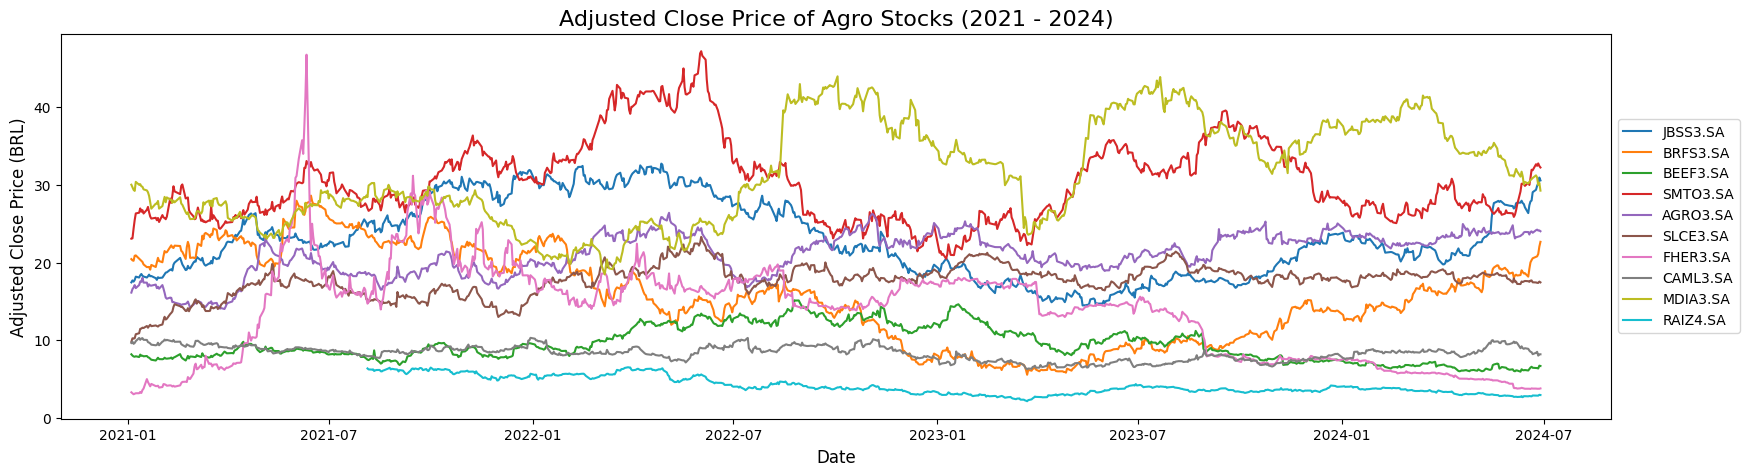

In [11]:
dados_pivot = dados_agro_consolidados.pivot_table(values='Adj Close', index=dados_agro_consolidados.index, columns='Ticker')

plt.figure(figsize=(20, 5))

for ticker in tickers:
    plt.plot(dados_pivot.index, dados_pivot[ticker], label=ticker)

plt.title('Adjusted Close Price of Agro Stocks (2021 - 2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price (BRL)', fontsize=12)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

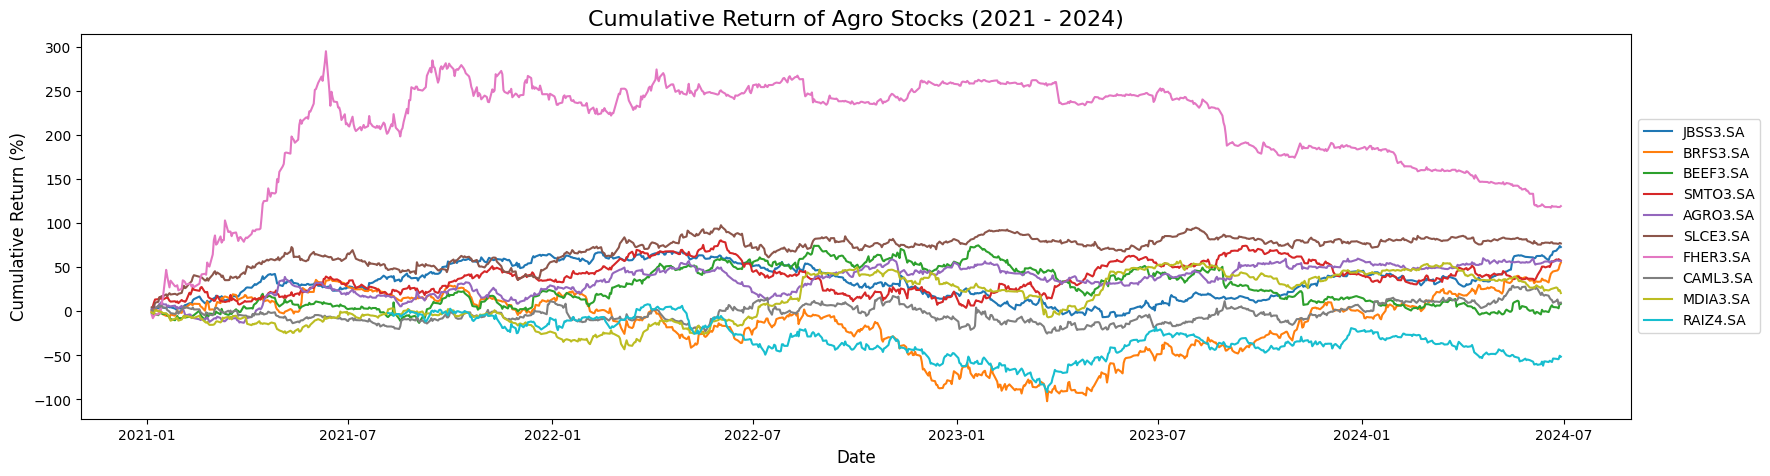

In [12]:
dados_pivot = dados_agro_consolidados.pivot_table(values='Cumulative Auto pct', index=dados_agro_consolidados.index, columns='Ticker')

plt.figure(figsize=(20, 5))

for ticker in tickers:
    plt.plot(dados_pivot.index, dados_pivot[ticker], label=ticker)

plt.title('Cumulative Return of Agro Stocks (2021 - 2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return (%)', fontsize=12)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [28]:
for ticker in tickers:

    display(dados_agro_consolidados[dados_agro_consolidados['Ticker'] == ticker])

,Ticker,Open,High,Low,Close,Adj Close,Volume,Auto_pct
Date,,,,,,,,
2021-01-04,JBSS3.SA,23.900000,24.170000,23.290001,23.410000,17.446259,10914500,NaN
2021-01-05,JBSS3.SA,23.290001,23.750000,22.799999,23.750000,17.699644,17855900,0.014524
2021-01-06,JBSS3.SA,23.750000,24.090000,23.450001,23.540001,17.543140,14518700,-0.008842
2021-01-07,JBSS3.SA,23.610001,24.379999,23.600000,23.830000,17.759264,16820400,0.012320
2021-01-08,JBSS3.SA,23.910000,24.610001,23.889999,24.400000,18.184055,19156200,0.023919
...,...,...,...,...,...,...,...,...
2024-06-24,JBSS3.SA,30.760000,31.090000,30.540001,31.000000,29.375261,6100400,0.010760
2024-06-25,JBSS3.SA,31.000000,31.540001,30.740000,31.540001,29.886961,7187900,0.017419
2024-06-26,JBSS3.SA,31.559999,32.040001,31.559999,31.889999,30.218616,8249900,0.011097


,Ticker,Open,High,Low,Close,Adj Close,Volume,Auto_pct
Date,,,,,,,,
2021-01-04,BRFS3.SA,21.132290,21.275076,20.256538,20.446918,20.446918,13219281,NaN
2021-01-05,BRFS3.SA,20.399324,20.427881,20.018562,20.285095,20.285095,6755926,-0.007914
2021-01-06,BRFS3.SA,20.285095,20.542109,20.123272,20.227982,20.227982,9332233,-0.002816
2021-01-07,BRFS3.SA,20.227982,20.970467,20.132790,20.875277,20.875277,13005394,0.032000
2021-01-08,BRFS3.SA,20.865757,21.208443,20.656338,20.922871,20.922871,7432044,0.002280
...,...,...,...,...,...,...,...,...
2024-06-24,BRFS3.SA,20.610001,21.040001,20.520000,20.730000,20.730000,8916800,0.008759
2024-06-25,BRFS3.SA,20.850000,21.020000,20.660000,20.799999,20.799999,8592100,0.003377
2024-06-26,BRFS3.SA,20.610001,21.200001,20.610001,21.100000,21.100000,7056600,0.014423


,Ticker,Open,High,Low,Close,Adj Close,Volume,Auto_pct
Date,,,,,,,,
2021-01-04,BEEF3.SA,10.23,10.32,10.03,10.04,8.185863,6117700,NaN
2021-01-05,BEEF3.SA,10.07,10.10,9.77,9.84,8.022798,13660000,-0.019920
2021-01-06,BEEF3.SA,9.85,9.86,9.70,9.70,7.908652,8358100,-0.014228
2021-01-07,BEEF3.SA,9.75,9.81,9.62,9.65,7.867886,7765900,-0.005155
2021-01-08,BEEF3.SA,9.67,9.85,9.66,9.73,7.933112,7458100,0.008290
...,...,...,...,...,...,...,...,...
2024-06-24,BEEF3.SA,6.40,6.52,6.35,6.43,6.430000,6155500,-0.003101
2024-06-25,BEEF3.SA,6.42,6.46,6.35,6.41,6.410000,3318300,-0.003110
2024-06-26,BEEF3.SA,6.38,6.44,6.34,6.36,6.360000,4597900,-0.007800


,Ticker,Open,High,Low,Close,Adj Close,Volume,Auto_pct
Date,,,,,,,,
2021-01-04,SMTO3.SA,27.629999,27.799999,27.000000,27.250000,23.075268,868400,NaN
2021-01-05,SMTO3.SA,27.299999,27.440001,26.670000,27.299999,23.117607,898700,0.001835
2021-01-06,SMTO3.SA,27.290001,29.180000,27.080000,28.770000,24.362402,2068700,0.053846
2021-01-07,SMTO3.SA,29.000000,30.780001,28.930000,30.080000,25.471708,3608800,0.045534
2021-01-08,SMTO3.SA,30.219999,31.650000,30.200001,31.090000,26.326979,2634300,0.033577
...,...,...,...,...,...,...,...,...
2024-06-24,SMTO3.SA,32.549999,33.470001,32.500000,33.150002,32.660027,1559600,0.024096
2024-06-25,SMTO3.SA,33.150002,33.270000,32.570000,32.950001,32.462982,1447900,-0.006033
2024-06-26,SMTO3.SA,32.950001,33.770000,32.639999,33.259998,32.768398,2456000,0.009408


,Ticker,Open,High,Low,Close,Adj Close,Volume,Auto_pct
Date,,,,,,,,
2021-01-04,AGRO3.SA,25.030001,25.750000,25.000000,25.000000,17.209066,165600,NaN
2021-01-05,AGRO3.SA,25.030001,25.700001,24.049999,25.700001,17.690922,246800,0.028000
2021-01-06,AGRO3.SA,25.700001,26.360001,25.500000,26.020000,17.911200,371200,0.012451
2021-01-07,AGRO3.SA,26.400000,27.150000,26.010000,26.500000,18.241611,442800,0.018447
2021-01-08,AGRO3.SA,26.799999,26.799999,25.900000,25.900000,17.828594,1671200,-0.022641
...,...,...,...,...,...,...,...,...
2024-06-24,AGRO3.SA,25.469999,25.930000,25.270000,25.780001,25.780001,243200,0.013763
2024-06-25,AGRO3.SA,25.719999,25.980000,25.709999,25.860001,25.860001,147300,0.003103
2024-06-26,AGRO3.SA,25.730000,25.809999,25.350000,25.730000,25.730000,225200,-0.005027


,Ticker,Open,High,Low,Close,Adj Close,Volume,Auto_pct
Date,,,,,,,,
2021-01-04,SLCE3.SA,11.475206,11.818181,11.260330,11.780991,9.795093,3011206,NaN
2021-01-05,SLCE3.SA,11.747933,12.367768,11.657024,12.322314,10.245166,4871218,0.045949
2021-01-06,SLCE3.SA,12.297520,12.516528,12.177685,12.289256,10.217681,2641188,-0.002683
2021-01-07,SLCE3.SA,12.371900,12.582644,12.285123,12.326446,10.248601,3100020,0.003026
2021-01-08,SLCE3.SA,12.380165,12.987603,12.355371,12.954545,10.770823,3334276,0.050955
...,...,...,...,...,...,...,...,...
2024-06-24,SLCE3.SA,17.469999,17.530001,17.340000,17.440001,17.440001,2147600,-0.001145
2024-06-25,SLCE3.SA,17.490000,17.500000,17.320000,17.389999,17.389999,1684100,-0.002867
2024-06-26,SLCE3.SA,17.389999,17.620001,17.299999,17.379999,17.379999,1804600,-0.000575


,Ticker,Open,High,Low,Close,Adj Close,Volume,Auto_pct
Date,,,,,,,,
2021-01-04,FHER3.SA,2.99,3.29,2.96,3.29,3.29,451600,NaN
2021-01-05,FHER3.SA,3.30,3.38,3.10,3.17,3.17,427600,-0.036474
2021-01-06,FHER3.SA,3.25,3.25,3.04,3.04,3.04,114800,-0.041009
2021-01-07,FHER3.SA,3.07,3.15,3.06,3.11,3.11,105400,0.023026
2021-01-08,FHER3.SA,3.11,3.28,3.11,3.17,3.17,232400,0.019293
...,...,...,...,...,...,...,...,...
2024-06-24,FHER3.SA,3.77,3.78,3.77,3.77,3.77,600,0.000000
2024-06-25,FHER3.SA,3.75,3.78,3.75,3.75,3.75,700,-0.005305
2024-06-26,FHER3.SA,3.75,3.75,3.75,3.75,3.75,1100,0.000000


,Ticker,Open,High,Low,Close,Adj Close,Volume,Auto_pct
Date,,,,,,,,
2021-01-04,CAML3.SA,11.15,11.17,10.86,10.92,9.645721,1108400,NaN
2021-01-05,CAML3.SA,10.94,11.15,10.66,11.12,9.822381,1620200,0.018315
2021-01-06,CAML3.SA,11.11,11.12,10.77,10.79,9.530889,1182900,-0.029676
2021-01-07,CAML3.SA,10.84,11.02,10.73,10.92,9.645721,2173100,0.012048
2021-01-08,CAML3.SA,11.08,11.53,11.06,11.19,9.884212,2951500,0.024725
...,...,...,...,...,...,...,...,...
2024-06-24,CAML3.SA,8.30,8.58,8.20,8.44,8.375357,1092800,0.020556
2024-06-25,CAML3.SA,8.44,8.57,8.36,8.57,8.504361,1047000,0.015403
2024-06-26,CAML3.SA,8.55,8.55,8.02,8.08,8.018114,1222300,-0.057176


,Ticker,Open,High,Low,Close,Adj Close,Volume,Auto_pct
Date,,,,,,,,
2021-01-04,MDIA3.SA,34.130001,34.419998,33.389999,33.580002,30.026464,815700,NaN
2021-01-05,MDIA3.SA,33.779999,33.779999,32.790001,33.200001,29.686680,1120000,-0.011316
2021-01-06,MDIA3.SA,33.400002,33.410000,32.750000,32.849998,29.373718,1127200,-0.010542
2021-01-07,MDIA3.SA,33.200001,33.200001,32.630001,32.689999,29.230646,1193000,-0.004871
2021-01-08,MDIA3.SA,32.790001,34.049999,32.689999,33.990002,30.393080,1255400,0.039768
...,...,...,...,...,...,...,...,...
2024-06-24,MDIA3.SA,31.010000,31.600000,30.809999,31.299999,31.229977,429900,0.010982
2024-06-25,MDIA3.SA,31.360001,31.360001,30.870001,31.030001,30.960583,459000,-0.008626
2024-06-26,MDIA3.SA,31.100000,31.180000,29.959999,30.049999,29.982773,1436500,-0.031582


,Ticker,Open,High,Low,Close,Adj Close,Volume,Auto_pct
Date,,,,,,,,
2021-08-05,RAIZ4.SA,7.48,7.60,7.18,7.24,6.362809,98849900,NaN
2021-08-06,RAIZ4.SA,7.25,7.35,7.03,7.10,6.239771,28799900,-0.019337
2021-08-09,RAIZ4.SA,7.18,7.31,7.07,7.07,6.213406,14491100,-0.004225
2021-08-10,RAIZ4.SA,7.12,7.16,7.05,7.10,6.239771,9988600,0.004243
2021-08-11,RAIZ4.SA,7.13,7.14,6.80,6.87,6.037637,31978000,-0.032394
...,...,...,...,...,...,...,...,...
2024-06-24,RAIZ4.SA,2.90,2.92,2.86,2.88,2.870224,10720000,-0.003460
2024-06-25,RAIZ4.SA,2.88,2.90,2.83,2.87,2.860257,8222000,-0.003472
2024-06-26,RAIZ4.SA,2.85,2.88,2.82,2.87,2.860257,8831500,0.000000
